## Question 1 - A

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

The new fruit is classified as: Apple
Fruit 1:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 2:
Euclidean Distance: 35.00
Manhattan Distance: 35.50
Minkowski Distance (p=3): 35.00
Fruit 3:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 4:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 5:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 6:
Euclidean Distance: 25.12
Manhattan Distance: 27.50
Minkowski Distance (p=3): 25.01


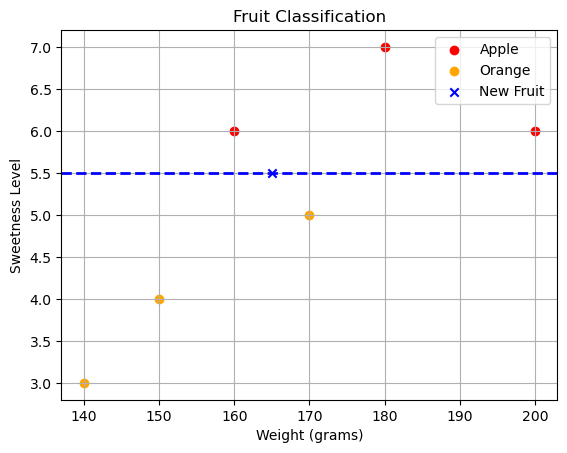

In [75]:
fruits = [
    {'id': 1, 'weight': 180, 'sweetness': 7, 'label': 'Apple'},
    {'id': 2, 'weight': 200, 'sweetness': 6, 'label': 'Apple'},
    {'id': 3, 'weight': 150, 'sweetness': 4, 'label': 'Orange'},
    {'id': 4, 'weight': 170, 'sweetness': 5, 'label': 'Orange'},
    {'id': 5, 'weight': 160, 'sweetness': 6, 'label': 'Apple'},
    {'id': 6, 'weight': 140, 'sweetness': 3, 'label': 'Orange'}
]

new_fruit = {'weight': 165, 'sweetness': 5.5}

def euclidean_distance(a, b):
    return np.sqrt((a['weight'] - b['weight'])**2 + (a['sweetness'] - b['sweetness'])**2)

def manhattan_distance(a, b):
    return abs(a['weight'] - b['weight']) + abs(a['sweetness'] - b['sweetness'])

def minkowski_distance(a, b, p=3):
    return (abs(a['weight'] - b['weight'])**p + abs(a['sweetness'] - b['sweetness'])**p)**(1/p)

def knn_classify(new_fruit, k=3):
    distances = []
    for fruit in fruits:
        dist = euclidean_distance(fruit, new_fruit) 
        distances.append((dist, fruit['label']))
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    labels = [neighbor[1] for neighbor in nearest_neighbors]
    return max(set(labels), key=labels.count)  

label = knn_classify(new_fruit, k=3)
print(f'The new fruit is classified as: {label}')

for fruit in fruits:
    print(f"Fruit {fruit['id']}:")
    print(f"Euclidean Distance: {euclidean_distance(fruit, new_fruit):.2f}")
    print(f"Manhattan Distance: {manhattan_distance(fruit, new_fruit):.2f}")
    print(f"Minkowski Distance (p=3): {minkowski_distance(fruit, new_fruit, p=3):.2f}")

def plot_data():
    for fruit in fruits:
        if fruit['label'] == 'Apple':
            plt.scatter(fruit['weight'], fruit['sweetness'], color='red', label='Apple' if fruit['id'] == 1 else "")
        else:
            plt.scatter(fruit['weight'], fruit['sweetness'], color='orange', label='Orange' if fruit['id'] == 3 else "")
    plt.scatter(new_fruit['weight'], new_fruit['sweetness'], color='blue', label='New Fruit', marker='x')
    plt.xlabel('Weight (grams)')
    plt.axhline(y=5.5, color='blue', linestyle='--', linewidth=2)
    plt.ylabel('Sweetness Level')
    plt.legend()
    plt.title('Fruit Classification')
    plt.grid(True)
    plt.show()

plot_data()
 

## Question 1 - B

The new fruit is classified as: Orange
Fruit 1:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 2:
Euclidean Distance: 35.00
Manhattan Distance: 35.50
Minkowski Distance (p=3): 35.00
Fruit 3:
Euclidean Distance: 15.07
Manhattan Distance: 16.50
Minkowski Distance (p=3): 15.00
Fruit 4:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 5:
Euclidean Distance: 5.02
Manhattan Distance: 5.50
Minkowski Distance (p=3): 5.00
Fruit 6:
Euclidean Distance: 25.12
Manhattan Distance: 27.50
Minkowski Distance (p=3): 25.01


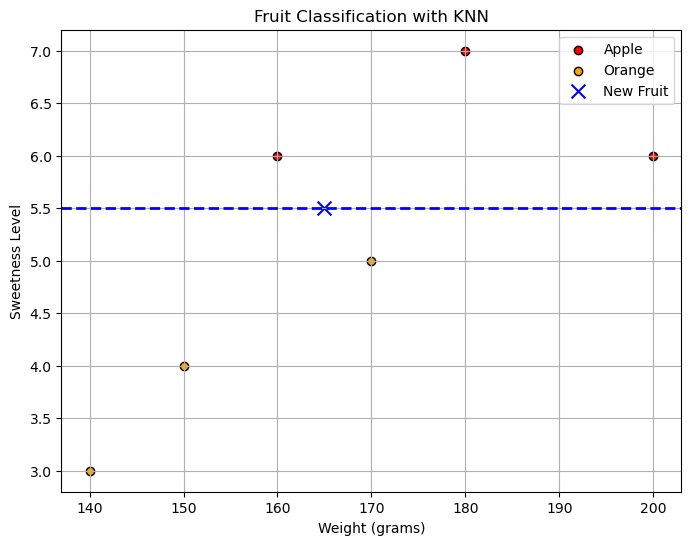

In [74]:
X = np.array([[180, 7], [200, 6], [150, 4], [170, 5], [160, 6], [140, 3]])
y = np.array([0, 0, 1, 1, 0, 1])

new_fruit = np.array([[165, 5.5]])

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X, y)

pred_label = knn.predict(new_fruit)
print(f'The new fruit is classified as: {"Apple" if pred_label == 0 else "Orange"}')

euclidean_distances = pairwise_distances(X, new_fruit, metric='euclidean')
manhattan_distances = pairwise_distances(X, new_fruit, metric='manhattan')
minkowski_distances = pairwise_distances(X, new_fruit, metric='minkowski', p=3)

for i in range(len(X)):
    print(f"Fruit {i+1}:")
    print(f"Euclidean Distance: {euclidean_distances[i][0]:.2f}")
    print(f"Manhattan Distance: {manhattan_distances[i][0]:.2f}")
    print(f"Minkowski Distance (p=3): {minkowski_distances[i][0]:.2f}")

def plot_decision_boundary():
    plt.figure(figsize=(8, 6))

    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', label='Apple', edgecolor='k')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='orange', label='Orange', edgecolor='k')
    plt.scatter(new_fruit[:, 0], new_fruit[:, 1], c='blue', label='New Fruit', marker='x', s=100)

    plt.axhline(y=new_fruit[0][1], color='blue', linestyle='--', linewidth=2)

    plt.xlabel('Weight (grams)')
    plt.ylabel('Sweetness Level')
    plt.title('Fruit Classification with KNN')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary()

## Question 2 - A

In [64]:
import math

diagnosis = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]

age = [30, 45, 50, 35, 40, 60, 25, 30, 55, 45]
blood_pressure = [1, 0, 1, 0, 1, 0, 0, 1, 0, 0]  
cholesterol = [1, 0, 1, 0, 1, 1, 0, 1, 0, 0]    

In [65]:
def calculate_entropy(y):
   total = len(y)
   positive = sum(y)
   negative = total - positive
   p_pos = positive / total
   p_neg = negative / total
   entropy = 0
   if p_pos > 0:
       entropy -= p_pos * math.log2(p_pos)
   if p_neg > 0:
       entropy -= p_neg * math.log2(p_neg)
   return entropy

In [66]:
def calculate_information_gain(feature, y):
   total_entropy = calculate_entropy(y)
   unique_values = set(feature)
   weighted_entropy = 0
   for value in unique_values:
       subset_y = [y[i] for i in range(len(y)) if feature[i] == value]
       weight = len(subset_y) / len(y)
       weighted_entropy += weight * calculate_entropy(subset_y)
   information_gain = total_entropy - weighted_entropy
   return information_gain

In [67]:
def best_feature_to_split(features, y):
   gains = []
   for feature in features:
       gain = calculate_information_gain(feature, y)
       gains.append(gain)
   best_feature_index = gains.index(max(gains))
   return best_feature_index, max(gains)

In [68]:
entropy_diagnosis = calculate_entropy(diagnosis)
print(f"Entropy of Diagnosis: {entropy_diagnosis}")

age_gain = calculate_information_gain(age, diagnosis)
bp_gain = calculate_information_gain(blood_pressure, diagnosis)
cholesterol_gain = calculate_information_gain(cholesterol, diagnosis)
print(f"Information Gain for Age: {age_gain}")
print(f"Information Gain for Blood Pressure: {bp_gain}")
print(f"Information Gain for Cholesterol: {cholesterol_gain}")

features = [age, blood_pressure, cholesterol]
best_feature_index, max_gain = best_feature_to_split(features, diagnosis)
feature_names = ['Age', 'Blood Pressure', 'Cholesterol']
print(f"Best feature to split on: {feature_names[best_feature_index]} (Gain: {max_gain})")

new_patient = [50, 0, 0]  
prediction_feature = features[best_feature_index]
def predict_using_best_feature(value, feature, y):
   unique_values = set(feature)
   value_class_map = {}
 
   for val in unique_values:
       subset_y = [y[i] for i in range(len(y)) if feature[i] == val]
       majority_class = max(set(subset_y), key=subset_y.count)
       value_class_map[val] = majority_class
   return value_class_map.get(value, 'Unknown')

predicted_class = predict_using_best_feature(new_patient[best_feature_index], features[best_feature_index], diagnosis)
print(f"The new patient (50 years old, low blood pressure, normal cholesterol) is classified as: {'Sick' if predicted_class == 1 else 'Healthy'}")

Entropy of Diagnosis: 1.0
Information Gain for Age: 1.0
Information Gain for Blood Pressure: 0.6099865470109875
Information Gain for Cholesterol: 1.0
Best feature to split on: Age (Gain: 1.0)
The new patient (50 years old, low blood pressure, normal cholesterol) is classified as: Sick


## Question 2 - B

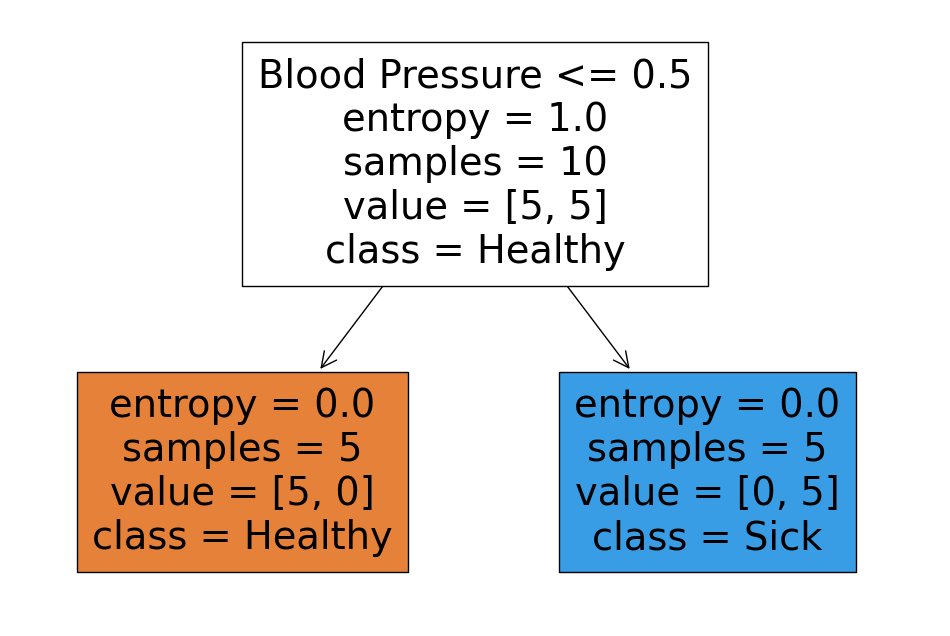

Prediction for new patient: Healthy


/usr/lib/python3/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [71]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = {
    'Age': [30, 45, 50, 35, 60, 55, 40, 25, 65, 45],
    'Blood Pressure': ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low'],
    'Cholesterol': ['High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal', 'High', 'Normal'],
    'Diagnosis': ['Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy', 'Sick', 'Healthy']
}

df = pd.DataFrame(data)

df['Blood Pressure'] = df['Blood Pressure'].map({'High': 1, 'Low': 0})
df['Cholesterol'] = df['Cholesterol'].map({'High': 1, 'Normal': 0})
df['Diagnosis'] = df['Diagnosis'].map({'Sick': 1, 'Healthy': 0})

X = df[['Age', 'Blood Pressure', 'Cholesterol']]
y = df['Diagnosis']

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=['Age', 'Blood Pressure', 'Cholesterol'], class_names=['Healthy', 'Sick'], filled=True)
plt.show()

new_patient = np.array([[50, 0, 0]])
prediction = clf.predict(new_patient)

diagnosis = 'Sick' if prediction == 1 else 'Healthy'
print(f"Prediction for new patient: {diagnosis}")